Steps:

Import Data

Exploratory Data Analysis

Data Preparation + Feature Enginnering

Split data in train and test

Feature importance using decision tree

Try Logistic Regresion

Try Neural Network

# Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import sklearn
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression,Perceptron,SGDClassifier
from sklearn.metrics import f1_score,accuracy_score,recall_score,classification_report,make_scorer,roc_curve, auc
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
df = pd.read_csv("../input/heart-disease-uci/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Exploratory Data Analysis

In [3]:
numeric_features = ['age','trestbps','thalach','oldpeak']
categorical_features = ['sex','cp','fbs','restecg','exang','slope','ca','thal']

In [4]:
df[numeric_features].describe()

,age,trestbps,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,149.646865,1.039604
std,9.082101,17.538143,22.905161,1.161075
min,29.000000,94.000000,71.000000,0.000000
25%,47.500000,120.000000,133.500000,0.000000
50%,55.000000,130.000000,153.000000,0.800000
75%,61.000000,140.000000,166.000000,1.600000
max,77.000000,200.000000,202.000000,6.200000


### Plotting distribution of numeric features

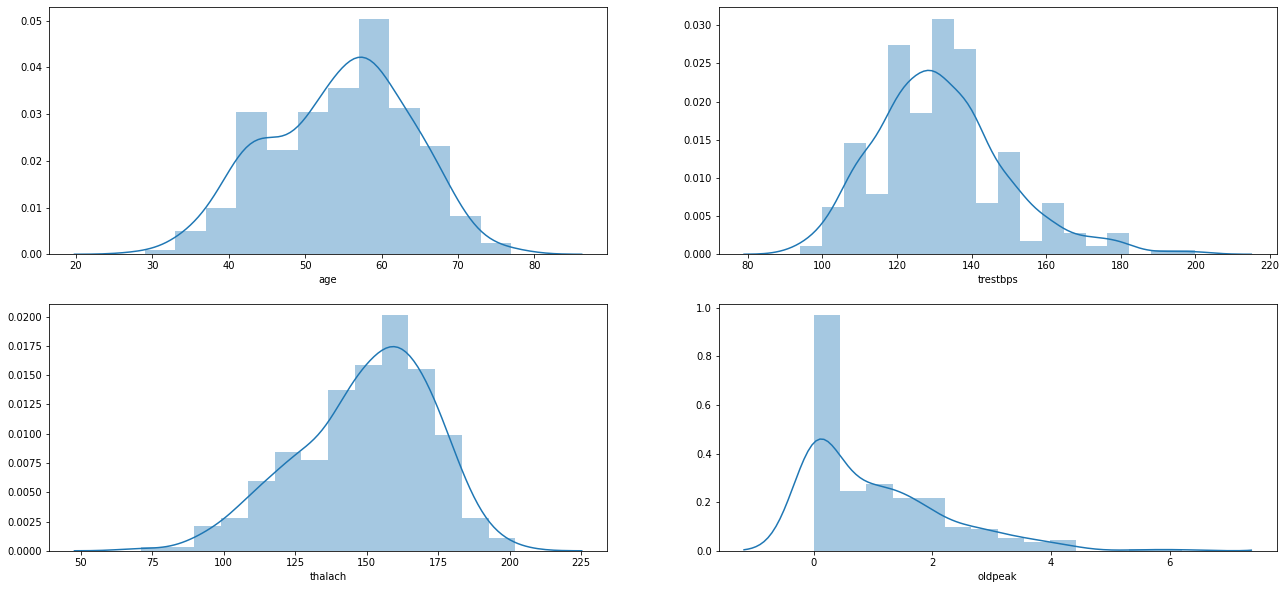

In [5]:
numerics = df[numeric_features]
fig, ax = plt.subplots(2,2,figsize=(22, 10))
for i, col in enumerate(numerics):
    plt.subplot(2,2,i+1)
    plt.xlabel(col, fontsize=10)
    sns.distplot(numerics[col].values)
plt.show() 

### Correlation between numeric features

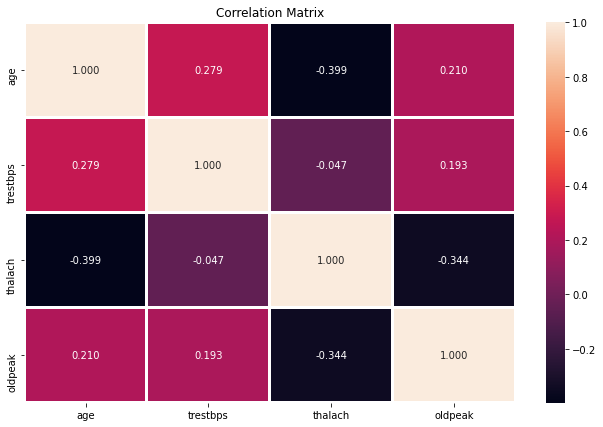

In [6]:
corr = numerics.corr()
sns.heatmap(corr,annot=True,fmt='.3f',linewidths=2)
plt.title('Correlation Matrix')
plt.gcf().set_size_inches(11,7)
plt.show()

### Plotting the frequency of categorical features

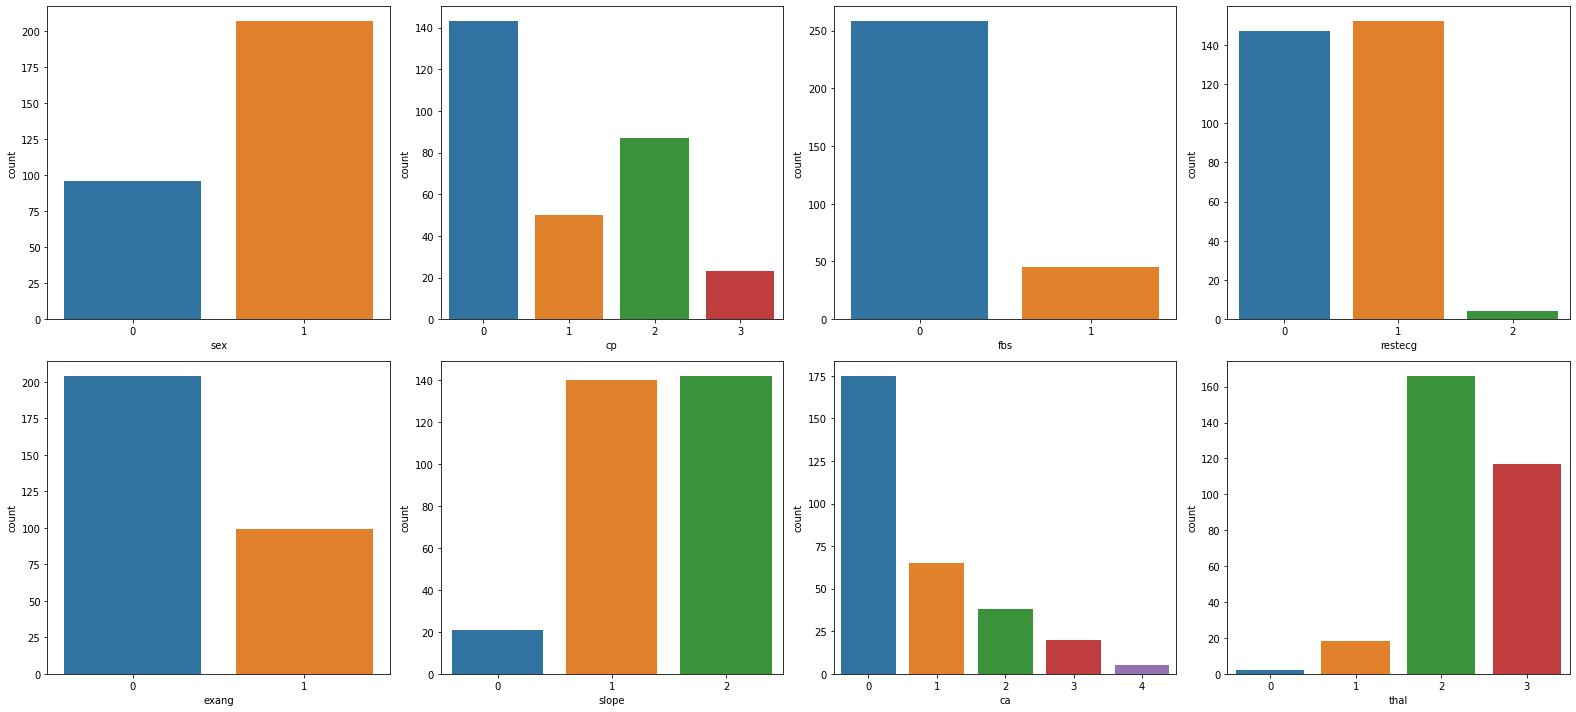

In [7]:
categorical = df[categorical_features]
fig, axes = plt.subplots(round(len(categorical.columns) / 4), 4, figsize=(22, 10))

for i, ax in enumerate(fig.axes):
    if i < len(categorical.columns):
        sns.countplot(x=categorical.columns[i], data=categorical, ax=ax)

fig.tight_layout()

### Plotting the frequency and distribution of age by target

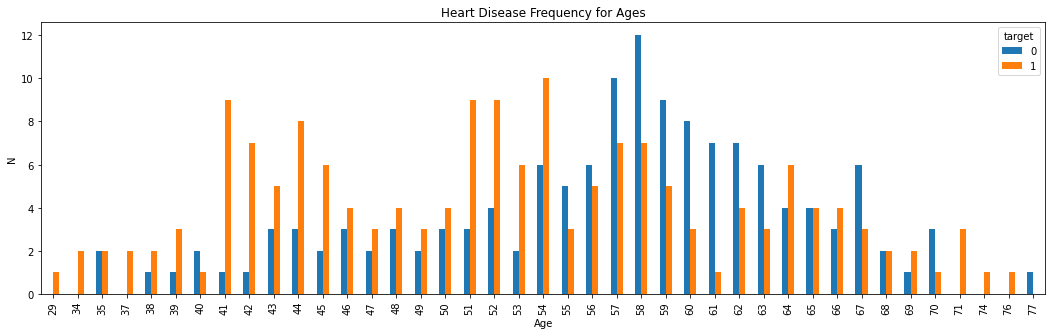

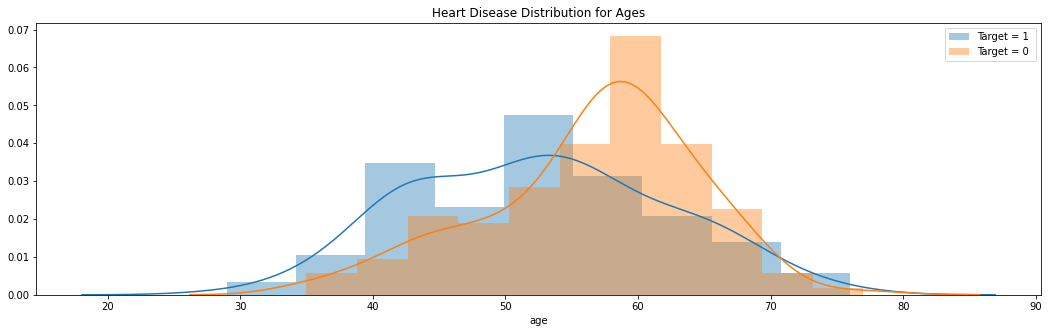

In [8]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(18,5))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('N')
plt.show()

plt.subplots(figsize=(18, 5))
plt.title('Heart Disease Distribution for Ages')
sns.distplot(df[df['target'] == 1]['age'], label="Target = 1 ")
sns.distplot(df[df['target'] == 0]['age'], label="Target = 0 ")
plt.legend()

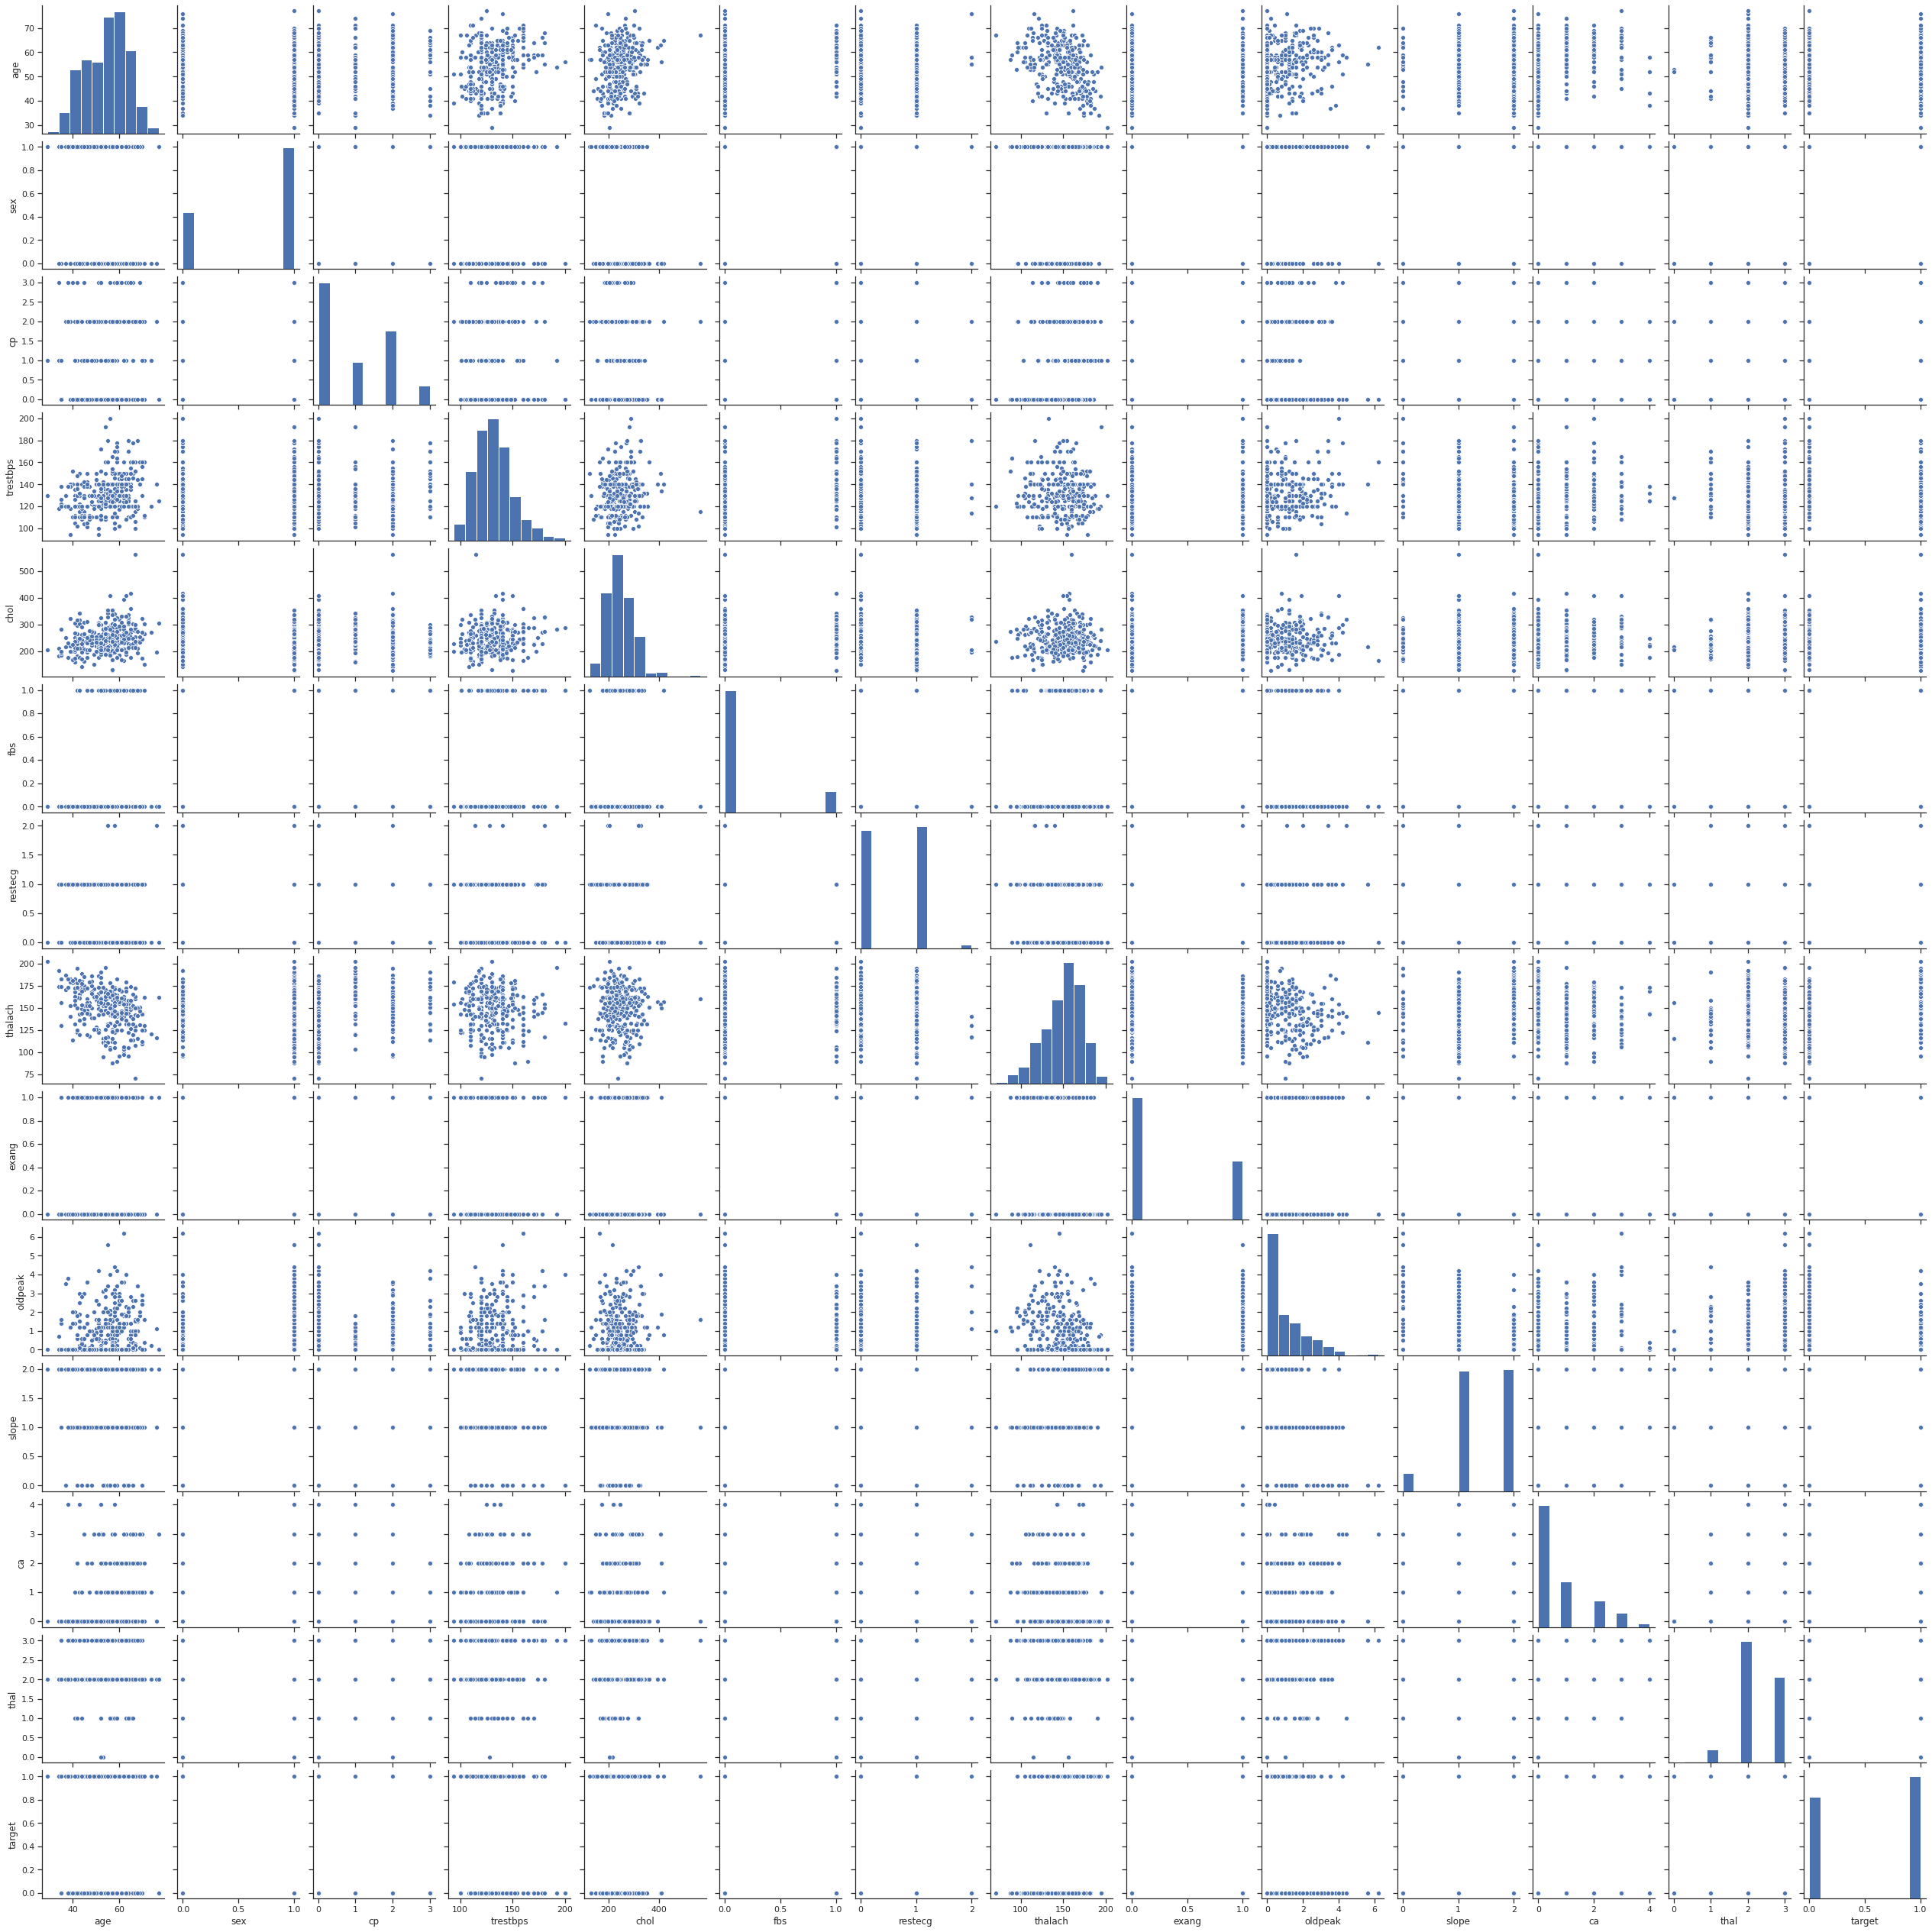

In [9]:
sns.set(style="ticks")
sns.pairplot(df)
plt.show()

# Data Preparation + Feature Enginnering

In [10]:
pd.options.mode.chained_assignment = None  # default='warn'

scaler = sklearn.preprocessing.StandardScaler().fit(df[numeric_features])
df[numeric_features]= scaler.transform(df[numeric_features])

df['sex'][df['sex'] == 0] = 'female'
df['sex'][df['sex'] == 1] = 'male'

df['cp'][df['cp'] == 1] = 'typical angina'
df['cp'][df['cp'] == 2] = 'atypical angina'
df['cp'][df['cp'] == 3] = 'non-anginal pain'
df['cp'][df['cp'] == 4] = 'asymptomatic'

df['fbs'][df['fbs'] == 0] = 'lower than 120mg/ml'
df['fbs'][df['fbs'] == 1] = 'greater than 120mg/ml'

df['restecg'][df['restecg'] == 0] = 'normal'
df['restecg'][df['restecg'] == 1] = 'ST-T wave abnormality'
df['restecg'][df['restecg'] == 2] = 'left ventricular hypertrophy'

df['exang'][df['exang'] == 0] = 'no'
df['exang'][df['exang'] == 1] = 'yes'

df['slope'][df['slope'] == 1] = 'upsloping'
df['slope'][df['slope'] == 2] = 'flat'
df['slope'][df['slope'] == 3] = 'downsloping'

df['thal'][df['thal'] == 1] = 'normal'
df['thal'][df['thal'] == 2] = 'fixed defect'
df['thal'][df['thal'] == 3] = 'reversable defect'

df = pd.get_dummies(df, drop_first=True)

# Split in train and test data

In [11]:
#Split data in train and test
y = df[['target']]
x = df.drop(['target'],axis = 1)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

# Feature Importance using decision tree

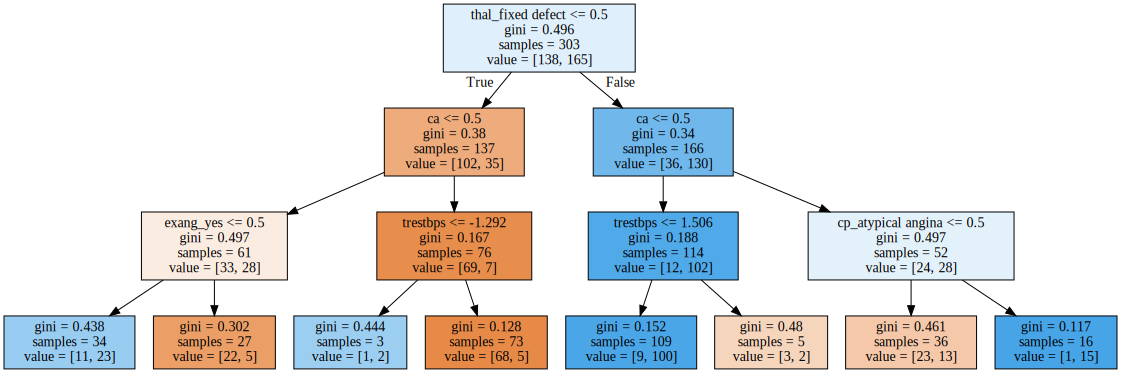

In [12]:
import os
from IPython.display import SVG
from graphviz import Source
import itertools

tree = DecisionTreeClassifier(max_depth=3)
tree.fit(x,y)
graph = Source(export_graphviz(tree
                               , feature_names=x.columns
                               , filled = True))
display(SVG(graph.pipe(format='svg')))

### Plotting the frenquency of thal fixed in target

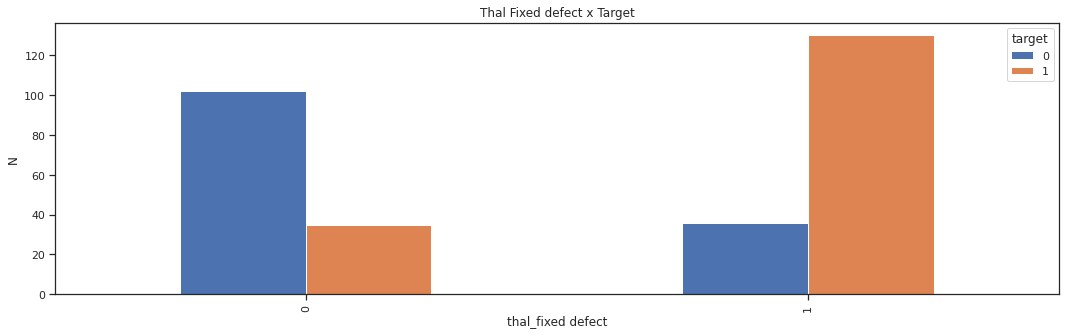

In [13]:
pd.crosstab(df['thal_fixed defect'],df.target).plot(kind="bar",figsize=(18,5))
plt.title('Thal Fixed defect x Target')
plt.xlabel('thal_fixed defect')
plt.ylabel('N')
plt.show()

### Plotting the frenquency of ca in target

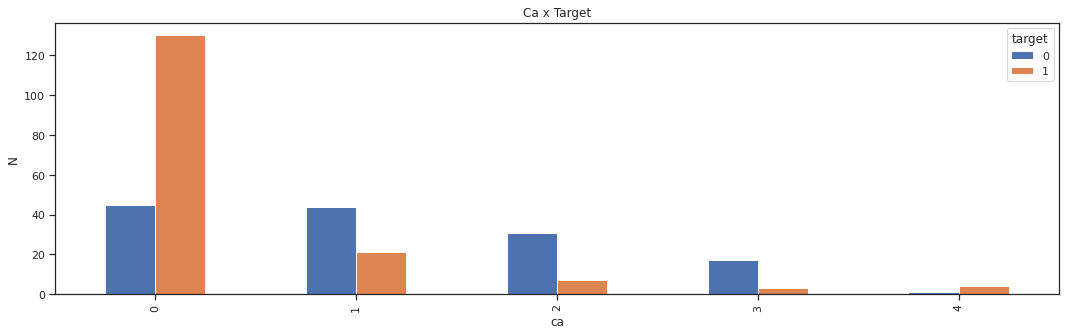

In [14]:
pd.crosstab(df['ca'],df.target).plot(kind="bar",figsize=(18,5))
plt.title('Ca x Target')
plt.xlabel('ca')
plt.ylabel('N')
plt.show()

# Modeling

### 1) Try logistic Regression

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


acc: 0.8241758241758241
recall: 0.82


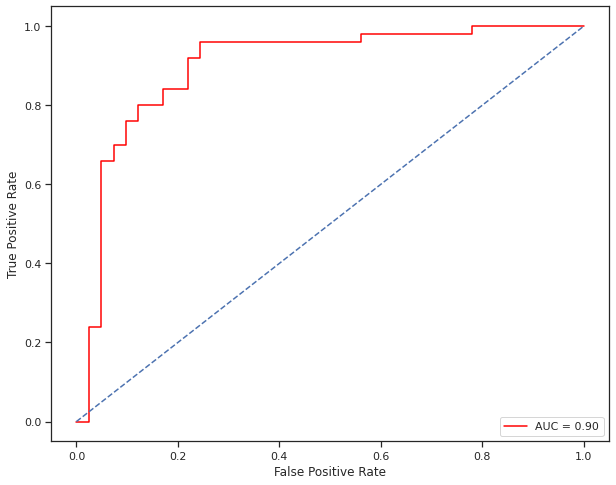

In [15]:
lr = LogisticRegression(class_weight = 'balanced', solver = 'liblinear',penalty="l2")
lr.fit(x_train,y_train)

y_prob = lr.predict_proba(x_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.figure(figsize=(10,8))
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

print("acc:",accuracy_score(y_test,y_pred))
print("recall:",recall_score(y_test,y_pred))

### 2) Try Neural Network

In [16]:
print('input_dim=',x_train.shape[1])

input_dim= 19


In [17]:
#Starting Neural network
model = Sequential()

#ADD a input layer and the first hidden layer
model.add(Dense(units = 10, kernel_initializer = 'normal', activation = 'relu', input_dim = 19))

#Add the second hidden layer
model.add(Dense(units = 10, kernel_initializer = 'normal', activation = 'relu'))

#Add the third hidden layer
model.add(Dense(units = 10, kernel_initializer = 'normal', activation = 'relu'))

#ADD the output layer
model.add(Dense(units = 1, kernel_initializer = 'normal', activation = 'sigmoid'))

#Compile the first Neural Network
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#Fit a train test in a NeuralNetwork
history = model.fit(x_train, y_train, validation_data= (x_test,y_test),batch_size = 32, epochs = 200)

Train on 212 samples, validate on 91 samples
Epoch 1/200
212/212 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5425 - val_loss: 0.6927 - val_accuracy: 0.5495
Epoch 2/200
212/212 [==============================] - 0s 70us/step - loss: 0.6927 - accuracy: 0.5425 - val_loss: 0.6926 - val_accuracy: 0.5495
Epoch 3/200
212/212 [==============================] - 0s 74us/step - loss: 0.6925 - accuracy: 0.5425 - val_loss: 0.6923 - val_accuracy: 0.5495
Epoch 4/200
212/212 [==============================] - 0s 70us/step - loss: 0.6923 - accuracy: 0.5425 - val_loss: 0.6921 - val_accuracy: 0.5495
Epoch 5/200
212/212 [==============================] - 0s 68us/step - loss: 0.6921 - accuracy: 0.5425 - val_loss: 0.6919 - val_accuracy: 0.5495
Epoch 6/200
212/212 [==============================] - 0s 69us/step - loss: 0.6918 - accuracy: 0.5425 - val_loss: 0.6917 - val_accuracy: 0.5495
Epoch 7/200
212/212 [==============================] - 0s 69us/step - loss: 0.6916 - accurac

In [18]:
#Predict the x_test
p = model.predict(x_test)
p = (p > 0.5)
print('ACC: %.3f%%' % (accuracy_score(y_test, p)*100))
print('---------')
print(classification_report(y_test, p))

ACC: 81.319%
---------
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



### Plotting Model Accurancy

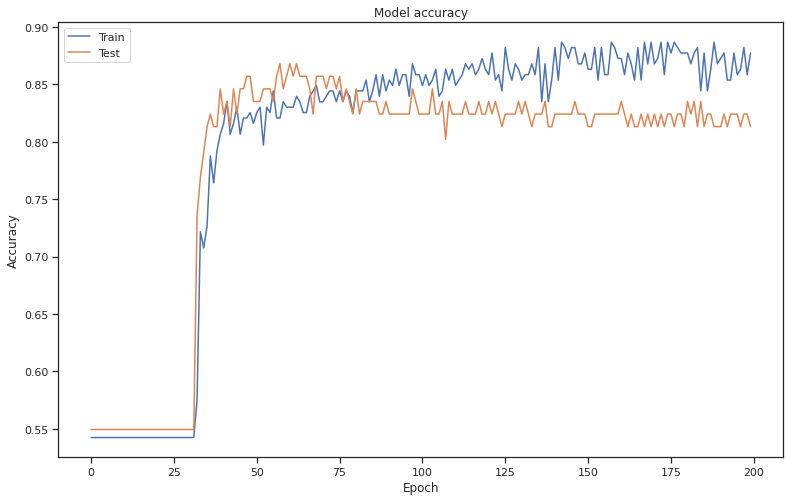

In [19]:
plt.subplots(figsize=(13, 8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Plotting Model Loss

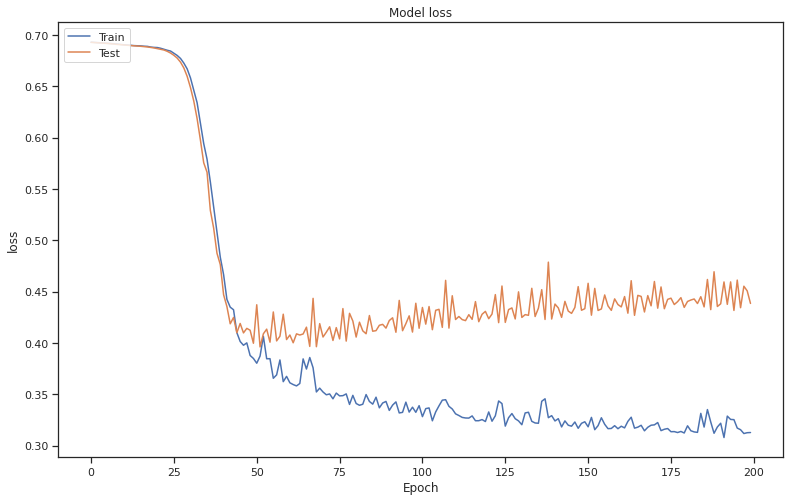

In [20]:
plt.subplots(figsize=(13, 8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()